In [1]:
!pip install pykrx

In [5]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
import pandas as pd
import numpy as np
import seaborn as sns
from pykrx import stock
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
# 삼성전자

data = stock.get_market_ohlcv_by_date("20050101","20221128","005930")
#print(data)

raw_df = pd.DataFrame(data).copy()

def MinMaxScaler(data):
    """최솟값과 최댓값을 이용하여 0 ~ 1 값으로 변환"""
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    return numerator / (denominator + 1e-7)

dfx = raw_df[['시가','고가','저가','거래량', '종가']]
dfx = MinMaxScaler(dfx)
dfy = dfx[['종가']]

x = dfx.values.tolist()
y = dfy.values.tolist()

data_x = []
data_y = []
window_size = 10

for i in range(len(y) - window_size):
    _x = x[i : i + window_size] # 다음 날 종가(i+windows_size)는 포함되지 않음
    _y = y[i + window_size]     # 다음 날 종가
    data_x.append(_x)
    data_y.append(_y)
print(_x, "->", _y)

train_size = int(len(data_y) * 0.7)
train_x = np.array(data_x[0 : train_size])
train_y = np.array(data_y[0 : train_size])

test_size = len(data_y) - train_size
test_x = np.array(data_x[train_size : len(data_x)])
test_y = np.array(data_y[train_size : len(data_y)])

# 모델 생성
model = Sequential()
model.add(LSTM(units=10, activation='relu', return_sequences=True, input_shape=(window_size, 5)))
model.add(Dropout(0.1))
model.add(LSTM(units=10, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=1))
model.summary()

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(train_x, train_y, epochs=60, batch_size=30)
pred_y = model.predict(test_x)



[[0.6965669988918088, 0.6497933884290807, 0.6893854748595649, 0.17688065789785323, 0.6487628243806292], [0.6888150609073214, 0.6456611570241264, 0.688268156423812, 0.13632496036234582, 0.6547978273981233], [0.6910299003314606, 0.6477272727266036, 0.6893854748595649, 0.14294991138867483, 0.6584188292086199], [0.686600221483182, 0.6404958677679333, 0.6849162011165532, 0.14725787805190763, 0.6427278213631349], [0.6843853820590428, 0.6446280991728878, 0.6860335195523061, 0.1355001773577458, 0.6475558237771303], [0.6799557032107642, 0.6384297520654562, 0.6793296089377885, 0.10384779105420429, 0.6427278213631349], [0.6744186046504159, 0.6322314049580245, 0.6737430167590237, 0.10421534066268788, 0.6330718165351441], [0.6777408637866249, 0.6332644628092632, 0.6782122905020355, 0.0970592521040946, 0.6378998189491395], [0.6777408637866249, 0.6373966942142175, 0.6804469273735414, 0.08997180779782085, 0.6427278213631349], [0.6799557032107642, 0.6373966942142175, 0.6793296089377885, 0.0739476879859

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


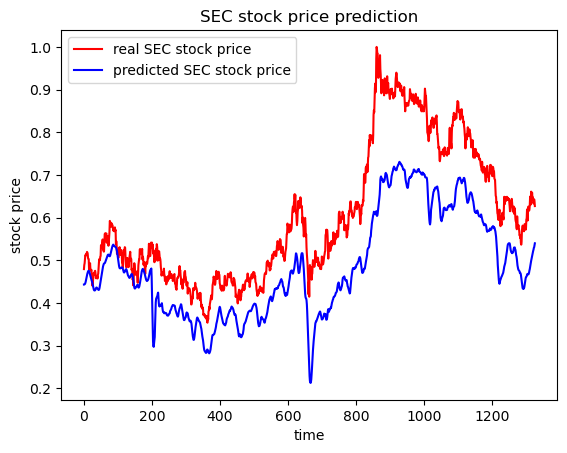

In [7]:
# Visualising the results
plt.figure()
plt.plot(test_y, color='red', label='real SEC stock price')
plt.plot(pred_y, color='blue', label='predicted SEC stock price')
plt.title('SEC stock price prediction')
plt.xlabel('time')
plt.ylabel('stock price')
plt.legend()
plt.show()

In [9]:
# raw_df.close[-1] : dfy.close[-1] = x : pred_y[-1]
samsung = raw_df.종가[-1] * pred_y[-1] / dfy.종가[-1]
print("Tomorrow's SEC price :", raw_df.종가[-1] * pred_y[-1] / dfy.종가[-1])

Tomorrow's SEC price : [51734.3]


In [11]:
samsung

array([51734.3], dtype=float32)

In [2]:
from flask import Flask


app = Flask(__name__)
@app.route('/')

def home():
     return samsung

if __name__ == '__main__':
     app.run()

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit


In [13]:
from flask import Flask

app = Flask(__name__)

@app.route('/')
def index():
    return samsung

if __name__ == '__main__':
    app.run(host='192.168.21.57', port='5011')

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://192.168.21.57:5011
Press CTRL+C to quit
